# Discussion 4: Hypothesis Testing with M&M's

<img src="https://raw.githubusercontent.com/stanford-mse-125/section/main/Discussions/img/mm.jpg" alt= “m&ms” width="100" /> <img src="https://raw.githubusercontent.com/stanford-mse-125/section/main/Discussions/img/mm.jpg" alt= “m&ms” width="100" /> <img src="https://raw.githubusercontent.com/stanford-mse-125/section/main/Discussions/img/mm.jpg" alt= “m&ms” width="100" /> <img src="https://raw.githubusercontent.com/stanford-mse-125/section/main/Discussions/img/mm.jpg" alt= “m&ms” width="100" /> <img src="https://raw.githubusercontent.com/stanford-mse-125/section/main/Discussions/img/mm.jpg" alt= “m&ms” width="100" /> <img src="https://raw.githubusercontent.com/stanford-mse-125/section/main/Discussions/img/mm.jpg" alt= “m&ms” width="100" />

Last week during Discussion, we worked through some of the principles of statistical inference using M&Ms. We will continue working with this data this week, this time focusing on Hypothesis Testing.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
from scipy import stats

## Refresher: Statistical Inference

The core principle of statistical inference is reasoning about things that we don't know using data. Last week, we focused on two concepts:

- **Estimation**: using observed data to generate a point estimate, or single best guess, of some population statistic. For example, in the M&Ms example from last week, we wanted to estimate the population proportion of M&Ms that are blue, and our point estimate was the proportion of M&Ms that were blue in the observed data, i.e. a single bag.
 
- **Confidence intervals**: intervals around the point estimate to represent the uncertainty of the estimate in the sampling distribution.

**Exercise**: Explain in your own words the concept of a sampling distribution, and why it is important.

**Exercise**: What does the sampling distribution represent in the context of the M&Ms problem from Discussion 3?

## Hypothesis Testing

Confidence intervals are a great tool for analytically and visually understanding the uncertainty in point estimates. However, sometimes we want to go a step further. Sometimes, we want to be able to conclude whether or not the population statistic is significantly different from some hypothesized value. Hypothesis testing is the framework that formally allows us to make such conclusions.

#### Jury Example

To motivate why we might be interested in hypothesis testing, consider the Jury selection example from the [testing lecture demo](https://github.com/stanford-mse-125/demos/blob/main/testing.ipynb). In this example, we have observed data that says that out of a panel of 100 people, only 8 were Black. For this data, we could estimate the sampling distribution and subsequently generate a confidence interval for the true percent of Black people that are selected for jury duty in this county. However, without additional context, a confidence interval for this proportion itself does not lead to any natural conclusion about whether or not the jury selection process was biased. 

Instead, we first formulate an initial hypothesis: the jury selection is racially unbiased. If this was the case, then the percent of Black people selected for jury duty would match the percent of Black people overall in the county, which is 26%. We can now use the tools of hypothesis testing to formally test whether or not this initial hypothesis is supported by the data that we have available. 

#### Hypothesis Testing Summary

Hypothesis testing can be summarized in the following steps:

1) Formulate a null and alternative hypothesis, and a significance level $\alpha$.
2) Estimate the sampling distribution *assuming the null hypothesis is true*
3) Compute a p-value using the estimated null sampling distribution and the observed point estimate.
4) Make a conclusion for the test based on the p-value.

### Null and Alternative Hypothesis



We start hypothesis testing by defining a *null* and *alternative* hypothesis. 

- The **null hypothesis** (often denoted $H_o$) is what we assume to be true during the testing procedure

- the **alternative hypothesis** (often denoted $H_a$) is, as it sounds, the alternative to the null hypothesis

In the jury selection example, the null hypothesis is that the jury selection is racially unbiased, while the alternative hypothesis is that the jury selection is racially biased. If we let $p$ represent the true population percent of Black people selected for jury duty in the county, then the hypotheses are:

\begin{align*}
H_o: p = 0.26 \qquad vs. \qquad H_a: p \neq 0.26
\end{align*}

#### One vs Two Sided Tests

In this class, it will *always* be the case that the null hypothesis is a single equality in mathematical notation. The alternative hypothesis can be one of two different forms:

- **One-Sided**: when the alternative hypothesis involves $<$ or $>$. For example, an alternative hypothesis like $H_a: p > 0.26$. 

- **Two-Sided**: when the alternative hypothesis involves a $\neq$. This is the most common in practice.

Choosing between a one-sided or two-sided alternative hypothesis will depend on the context of the problem, and this choice will effect how we end up computing p-values, as we will see later in this notebook.

**Exercise**: Is the jury example from lecture a one-sided or two-sided test? Would it make sense for it to be the opposite?

### Significance Level

We also need to define a significance level $\alpha$. This is the probability that we make a false positive error that we are comfortable with in our test. In practice, we *almost always* use $\alpha = 0.05$. There's really no good reason for this, other than that people have been doing this for a very long time and it's the standard. For example, [this article](https://www.nature.com/articles/s41562-017-0189-z) suggests that 0.005 may actually be a better value for $\alpha$, but alas, $\alpha=0.05$ is still the standard.

**Exercise**: Let's now formulate a hypothesis test for M&Ms. Let's say that your bag of M&Ms from Discussion 3 had 18 blue M&Ms out of 48 total M&Ms (feel free to use your actual data if you participated in class last week!). Since last week, you reached out to the director of operations at the M&M company to ask what the actual percent of M&Ms is in the M&M machine. They respond back and say that they don't know for sure, but they think the actual percent is 20%. Formulate the null and alternative hypothesis for a hypothesis test that tests this claim.

### Sampling Distribution Under the Null

In discussion last week, we focused a lot on estimating the sampling distribution without making any assumptions about the true population statistic. In hypothesis testing, it is slightly different. We now have a null hypothesis, which tells us a hypothesized value for the true population statistic, and we want to estimate the sampling distribution *assuming the null hypothesis is true*. This is sometimes also called the null sampling distribution or the null distribution.

How we actually go about estimating the sampling distribution under the null hypothesis depends on the type of hypothesis test. The [testing lecture](https://stanford-mse-125.github.io/website-2023/lectures/hypothesis.pdf) as well as the [testing demo](https://colab.research.google.com/github/stanford-mse-125/demos/blob/main/testing.ipynb) give a good overview of different strategies for different types of problems, and we will talk about these later in this notebook. 

**Exercise**: Let's work through estimating the null distribution for the M&Ms hypothesis test. Complete the code below to generate samples from the null distribution for this test. You can refer to the testing demo code for the jury selection example as a reference.

In [ ]:
np.random.seed(10)

# Dataframe describing the data from the null hypothesis
null_data = pd.DataFrame({
    'color': [], # fill
    'proportion': [] # fill
})

B = 10000
null_estimates = np.zeros(B)
for i in range(B):
    # Generate samples from the null distribution in null_data
    sample = null_data.sample(...) # fill

    # Generate a point estimate from the above sample
    try:
        estimate = ... # fill
    except:
        estimate = 0

    null_estimates[i] = estimate

# Plot a histogram of the null distribution samples
sns.histplot(x=null_estimates, bins=19)

### Hypothesis Test Conclusions

After performing a hypothesis test, one of two conclusions is made:
- **Rejecting the null**: when there is enough evidence to reject the null hypothesis in favor of the alternative hypothesis. 
- **Failing to reject the null**: when there is *not* enough evidence to reject the null hypothesis in favor of the alternative hypothesis

#### Accepting the Null

It's very important to remember that **accepting the null is never a valid conclusion** from a hypothesis test. Why? We assumed that the null hypothesis was true when performing the hypothesis test. The best way to think about this is to think about the US legal system: during a trial, the accused person is always *innocent until proven guilty*. That is, we assume that the defendent is innocent, and only conclude that they are guilty if there is enough evidence to make such a conclusion. Further, if there is not enough evidence to prove guilt, we do not conclude that the defendent is innocent, but instead conclude that the defendent is *not guilty*. It's a very subtle but important difference to keep in mind. 

**Exercise**: Review the jury selection code from the [testing demo](https://colab.research.google.com/github/stanford-mse-125/demos/blob/main/testing.ipynb) from lecture. What would it mean to reject the null hypothesis in this case? What would it mean to fail to reject the null hypothesis? Which of these conclusions is reached in this example?

**Exercise**: Review the slides from the [testing slides](https://stanford-mse-125.github.io/website-2023/lectures/hypothesis.pdf) on false positives and false negatives. Describe what a false negative and a false positive would be in the context of a criminal trial as described above. Also, describe what a false negative and false positive would be in the context of the jury selection hypothesis test.

### p-values

Let's say we now have estimated the sampling distribution under the null distribution, now how do we make a conclusion about our test? The standard way to do this is to use a p-value. The p-value for a hypothesis test is the probability of getting a result at least as extreme as the point estimate from the observed data, assuming the null hypothesis. 

Here's one way to think about the concept of a p-value. How likely is it that, if we assume the null hypothesis, we will observe our point estimate by random chance? A low p-value tells us that the answer to this question is "extremely unlikely" - which gives us evidence to reject the null.

We have to be a little bit careful, though, because generating a p-value is slightly different depending on if we use a one-sided or a two-sided hypothesis test. Consider the plot below:

Text(0.5, 1.0, 'Two Sided P-Value')

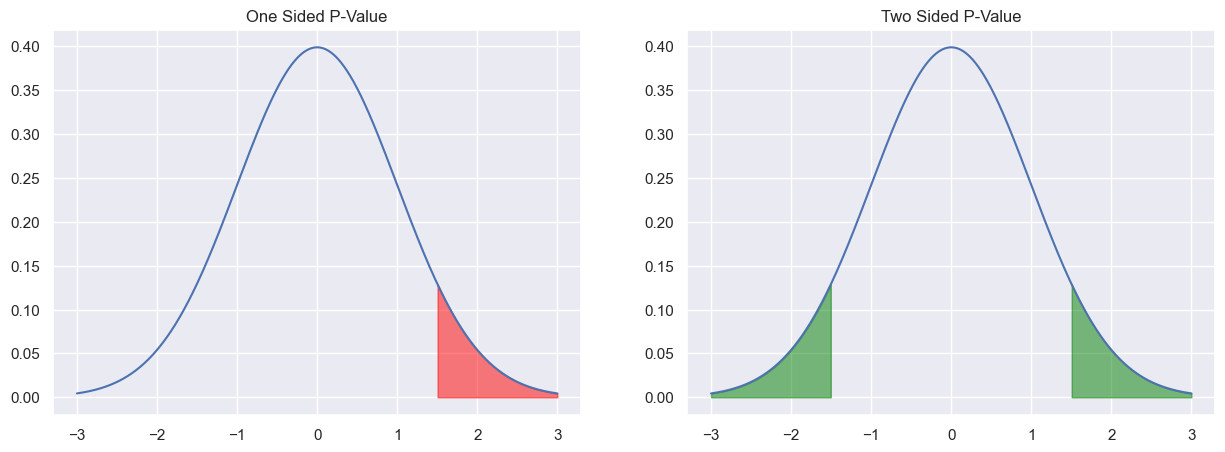

In [77]:
# Generate some random data to simulate a sampling distribution
x = np.linspace(-3, 3, 1000)
density = stats.norm.pdf(x)

# We'll say that the observed statistic is 2
obs_stat = 1.5

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot a one-sided p-value
sns.lineplot(x=x, y=density, ax=axes[0])
axes[0].fill_between(x[x > 1.5], density[x > 1.5], color='red', alpha=0.5)
axes[0].set_title("One Sided P-Value")

# Plot a two-sided p-value
sns.lineplot(x=x, y=density, ax=axes[1])
axes[1].fill_between(x[x > 1.5], density[x > 1.5], color='green', alpha=0.5)
axes[1].fill_between(x[x < -1.5], density[x < -1.5], color='green', alpha=0.5)
axes[1].set_title("Two Sided P-Value")


In this example, our observed statistic is 1.5. For the one-sided p-value, we only look at the area under the curve of the null distribution *to the right* of the observed statistic. For the two-sided p-value, however, we have to look at the area to the right of 1.5 *as well as* the area to the left of -1.5. When using a normal approximation, this results in the two-sided p-value always being exactly twice as large as the one-sided p-value (**Exercise**: why?).

In code, this will look something like this:

In [3]:
# Assuming that the null sampling distribution is just a standard normal
# And the observed statistic is 1.5

# one-sided p-value
print(f"One-sided p-value: {1 - stats.norm.cdf(1.5)}")

# two-sided p-value
print(f"One-sided p-value: {2 * (1 - stats.norm.cdf(1.5))}")

One-sided p-value: 0.06680720126885809
One-sided p-value: 0.13361440253771617


In general, the lower the p-value is, the more evidence we have in favor of the alternative. This is because the lower the p-value, the less likely it is that we will get the observed point estimate if the null were to be true, meaning the null is less likely to be true! In fact, the following rule exactly tells us how to test at a $\alpha$ significance level from a p-value:

- If the p-value is less than $\alpha$, then we reject the null.
- If the p-value is greater than $\alpha$, then we fail to reject the null.

**Exercise**: Explain why the above rule makes sense, using what you know about p-values and significance rates $\alpha$. 

**Exercise**: Complete the below code to generate a p-value for the M&Ms hypothesis test. This p-value should be the p-value for a *two-sided test*, and so it should be calculated corresponding to the right subplot above.

In [ ]:
# p-value using empirical counts
pval_count = ... # fill
print(f"Count-based p value: {np.round(pval_count, 4)}")

# p-value using normal approximation
pval_norm_approx = ... # fill
print(f"Normal approximation p value: {np.round(pval_norm_approx, 4)}")

**Exercise**: Based on your p-value from the previous exercise (one of the two), should you reject the null hypothesis, or fail to reject the null hypothesis, using $\alpha = 0.05$? Interpret the corresponding conclusion in the context of this problem. Does the result change depending on which p-value you use?

## Comparing Two Means

The hypothesis test that we just did for the M&M problem is usually called a *one sample proportions test*. Another very popular test is called a *two-sample t-test*, which is used to compare the mean of two different features. An example of a two-sample t-test is the deflategate example in the testing demo from lecture. Let's do another simple example of a two-sample t-test using the titanic data.

In [32]:
titanic_path = "https://raw.githubusercontent.com/stanford-policylab/mse125/31b8b50be0eafcb4c48a1ce3ca732556429a0824/week_1/titanic.csv"
titanic_data = pd.read_csv(titanic_path)

Let's do a test to compare the age of males and females onboard the titanic. Whenever we do a two-sample test, our null hypothesis will be that the population statistic in the two sample are equal, while the alternative hypothesis can be a one-sided or two-sided alternative as described before. In a two-sample t-test, the population statistic in the two samples is the mean, but we can compare any population statistic in the two samples! A two-sample test works in the following steps:

1) Null hypothesis: assume that the population is the same for the two groups.
2) Prepare data with one column for group identification and one group for the values.
3) For each sampling trial, sample with replacement the values, but keep the group labels the same. Then, record the difference of the sample statistic for the two groups.
4) Generate p-value using collection of sample differences as null distribution, and observed difference as the point estimate.

**Exercise**: Complete the below code to do a two-sample t-test on the titanic data comparing the average age of men and women.

In [ ]:
np.random.seed(10)

B = 10000
null_estimates = np.zeros(B)
for i in range(B):

    # Generate sample by sampling with replacement from the age column
    # and leaving the sex column.
    sample = pd.DataFrame({
        'Sex': [], # fill
        'Age': [], # fill
    })

    # Estimate the difference between average age of men and women in the sample
    null_estimates[i] = ... # fill

# Calculate the observed difference of means in the original data.
obs_estimate = ... # fill

# Calculate the p-value using normal approximation
p_val = ... # fill
print(f"P value from normal approximation: {np.round(p_val, 4)}")

## Hypothesis Testing Using Confidence Intervals

Using p-values is the most common way that hypothesis testing is done in practice. However, another perfectly valid way to do hypothesis testing is to use confidence intervals. The process is actually pretty straightforward. As with the p-value method, we start by formulating a null and alternative hypothesis based on some hypothesized true value of the parameter of interest, and a significance level $\alpha$. Then, we generate a $(1 - \alpha)\%$ confidence interval for the observed point estimate, and reject the null hypothesis if the hypothesized true value is not contained inside the confidence interval.

The below code taken from Discussion 3 generates a confidence interval for the M&Ms data.

In [40]:
synth_bags = np.random.binomial(n=48, p=18 / 48, size=1000)

# get the proportion of each bag with blue M&M's
synth_sampling_dist = synth_bags / 48

# percentile method
print(np.quantile(synth_sampling_dist, [0.025, 0.975]))

[0.25       0.50052083]


In previous sections, we conducted a hypothesis test to see if the true proportion of blue M&Ms was equal to 0.20 using the p-value approach. Using the confidence interval approach, we can simply check whether or not 0.20 is included in the above confidence interval! In this case, 0.20 is not included in the interval, and so we would reject the null hypothesis. This aligns with the conclusion we got from the p-value approach. 

**Exercise**: What would have happened if we had a smaller bag of M&Ms? Use the same observed proportion, but reduce $n$ by 20 for whatever M&M data you are using. For example, if you are using the suggested 18 / 48 data, then use the same proportion but pretending that $n = 28$. Alter the code from the previous code cell to generate a new confidence interval with this smaller sample size, and see how that affects the results of your hypothesis test.